# PRÁCTICA 3 TIV

#### 1) Leer y representar la imagen riceBGgradient.tif

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import data, util, exposure, color, feature
from PIL import Image

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin, reconstruction,
                               opening, closing, dilation, erosion)

from skimage import data
from skimage.util import invert
from skimage import filters
from skimage import feature


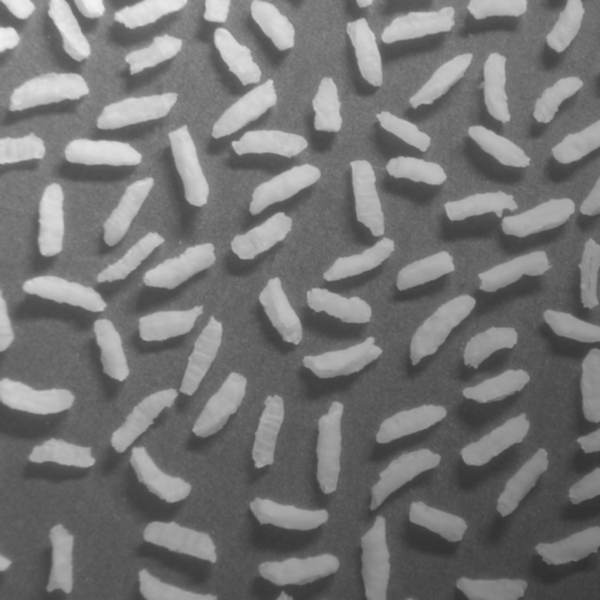

(600, 600)
formato: TIFF
modo:  L


In [4]:
file = 'images/riceBGgradient.tif'

ImgRice  = Image.open(file)
display(ImgRice)
print(ImgRice.size)
print('formato:', ImgRice.format)
print('modo: ', ImgRice.mode)

#### 2) Intenta separar los granos del fondo estableciendo un umbral

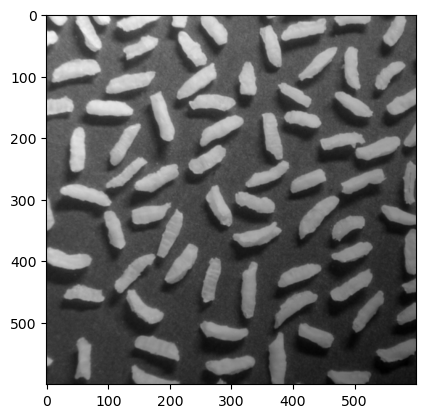

In [9]:
img = np.array(ImgRice) #Pasamos la imagen a numpy
plt.figure()
plt.imshow(img, cmap='gray')

A continuación, mostraremos el histograma de la imagen para saber los niveles de blanco y negro que hay en ella

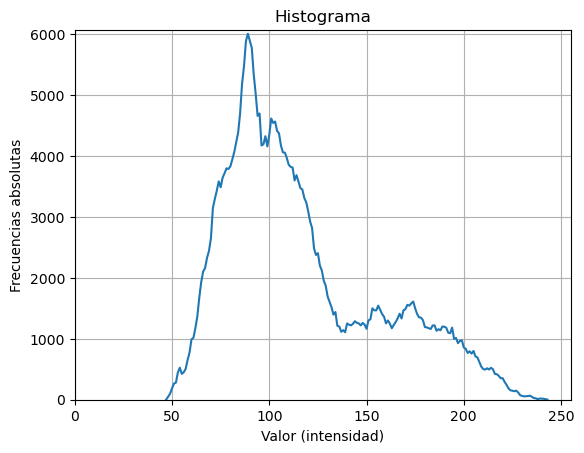

In [11]:
img_hist, bins = exposure.histogram(img, normalize=False)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias absolutas')
plt.grid()


Vemos que los niveles de la imagen están entre los 50 y 250 aproximadamente, con esto podremos establecer un umbral creando una máscara

Text(0.5, 1.0, 'Imagen transformada')

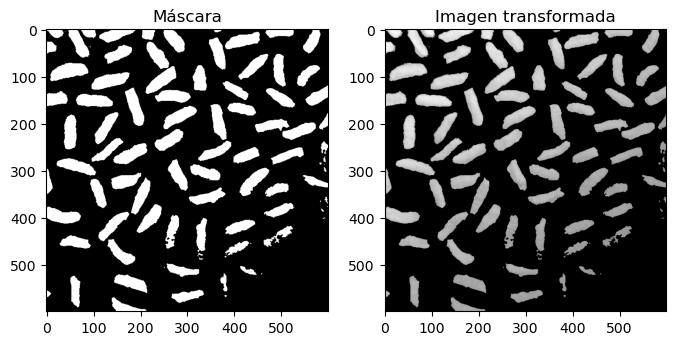

In [41]:
th_0, th_1 = 143, 255

mask = np.logical_and(img > th_0, img < th_1)

img_seg = img*mask

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')

plt.subplot(122)
plt.imshow(img_seg, cmap='gray')
plt.title('Imagen transformada')


140 es valor mínimo necesario para que el fondo de la máscara esté cubierta, pero como podemos ver, los granos de arroz de la parte inferior derecha, empiezan a desaparecer porque en la imagen original, esta esquina es la más oscura de la imagen, y al poner un valor tan alto de umbral, se come a los granos de arroz que pertenecen a esa parte de la imagen.

Debido a que la imagen no es homogénea, tendremos que intentar igualar el valor de intensidad del fondo para poder aplicar una máscara después

#### 3) Como habrás visto, no es posible obtener un resultado satisfactorio debido a la inhomogeneidad en la iluminación. Utiliza una transformación morfológica top-hat para corregir la iluminación, tal y como se ha hecho en clase

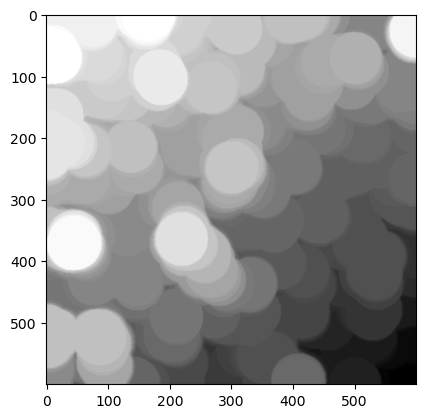

In [72]:
# Variamos el nivel de apertura. 
# Debemos igualar la iluminación de la imagen, para ello usamos un elemento estructurante en forma de disco
background = opening(ImgRice, disk(42))
plt.imshow(background, cmap='gray')

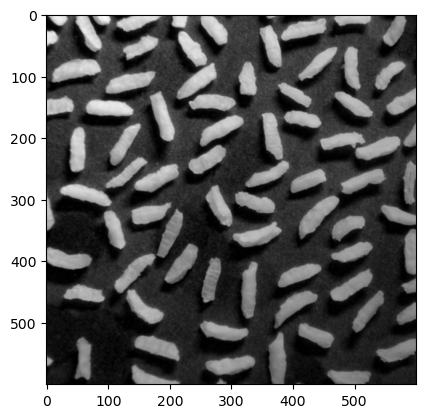

In [73]:
img_background = img-background
plt.imshow(img_background, cmap='gray')

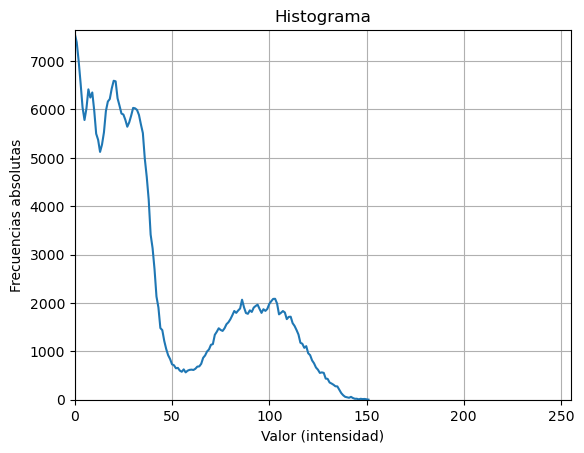

In [74]:
img_hist2, bins = exposure.histogram(img_background, normalize=False)
plt.plot(bins, img_hist2)
plt.axis([0,255, 0, 1.01*img_hist2.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias absolutas')
plt.grid()

Como podemos observar en el histograma, ahora los valores de intensidad, están más concentrados en el 0, puesto que el fondo es más homogéneo y es de un color aproximado al negro

#### 4) Busca ahora un umbral. Para buscar el umbral, puedes ayudarte con la función “skimage.filters.threshold_otsu”

In [70]:
from skimage.filters import threshold_otsu
#image=None, nbins=256, *, hist=None

In [65]:
print("Umbral: ")
print(threshold_otsu(img_background))

Umbral: 
57


Con este valor, ya sabemos que umbral aplicarle a la imagen para poder obtener la máscara. Es posible utilizar este valor tan bajo en comparación con la anterior vez que intentamos sacar la mñascara, debido al proceso de homogenizar el fondo.

Text(0.5, 1.0, 'Imagen Homogénea Transformada')

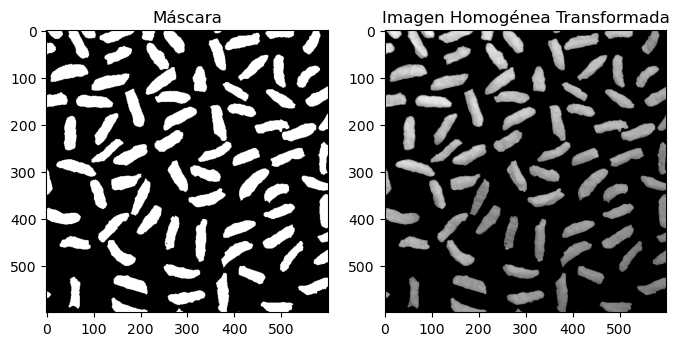

In [71]:
th_0, th_1 = 57, 255

mask = np.logical_and(img_background > th_0, img_background < th_1)

img_seg2 = img_background*mask

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('Máscara')

plt.subplot(122)
plt.imshow(img_seg2, cmap='gray')
plt.title('Imagen Homogénea Transformada')
